# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# print(api_keys)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


610


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [28]:
# Create a data frame for measured values
data_df = pd.DataFrame({'City':[],
                        'Cloudiness':[],
                        'Country':[],
                        'Date':[],
                        'Humidity':[],
                        'Lat':[],
                        'Lng':[],
                        'Max_temp':[],
                        'Wind_speed':[]
                       })

In [29]:
# URL with apikey input
url = (f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q=")

i = 0
# Make requests with url to extract data
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response['cod'] == 200):
        i = i+1
        print(f'Processing Record {i} | {city}')
        print(response_req.url)

        data_df.loc[i,'City'] = city
        data_df.loc[i,'Cloudiness'] = response['clouds']['all']
        data_df.loc[i,'Country'] = response['sys']['country']
        data_df.loc[i,'Date'] = response["dt"] 
        data_df.loc[i,'Humidity'] = response['main']['humidity']
        data_df.loc[i,'Lat'] = response['coord']['lat']
        data_df.loc[i,'Lng'] = response['coord']['lon']
        data_df.loc[i,'Max_temp'] = response['main']['temp_max']
        data_df.loc[i,'Wind_speed'] = response['wind']['speed']
# Make an exception incase link is invalid
    else:
        print('City not found. Skipping')
        
# Make a notification to alert the completion of the task        
print("-"*20)
print("Data Retrieval Complete")      
print("-"*20)

Processing Record 1 | todos santos
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=todos%20santos
Processing Record 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=bredasdorp
Processing Record 3 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=grindavik
Processing Record 4 | lata
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=lata
Processing Record 5 | bad driburg
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=bad%20driburg
Processing Record 6 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=mataura
Processing Record 7 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=im

Processing Record 58 | east london
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=east%20london
Processing Record 59 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=vestmannaeyjar
Processing Record 60 | kaeo
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=kaeo
Processing Record 61 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=khatanga
Processing Record 62 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=port%20alfred
Processing Record 63 | bagdarin
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=bagdarin
Processing Record 64 | ola
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&uni

City not found. Skipping
Processing Record 114 | ngunguru
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=ngunguru
Processing Record 115 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=maniitsoq
Processing Record 116 | kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=kasongo-lunda
Processing Record 117 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=souillac
Processing Record 118 | kisanga
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=kisanga
Processing Record 119 | poum
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=poum
Processing Record 120 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d09

Processing Record 168 | bure
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=bure
Processing Record 169 | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=coquimbo
Processing Record 170 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=laguna
Processing Record 171 | jutai
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=jutai
Processing Record 172 | mwinilunga
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=mwinilunga
Processing Record 173 | maumere
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=maumere
Processing Record 174 | vostok
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=vostok
City 

Processing Record 224 | kalmunai
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=kalmunai
Processing Record 225 | calvia
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=calvia
Processing Record 226 | cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=cockburn%20town
Processing Record 227 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=kahului
Processing Record 228 | alindao
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=alindao
Processing Record 229 | ust-kut
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=ust-kut
Processing Record 230 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=im

Processing Record 280 | darab
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=darab
Processing Record 281 | baykalsk
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=baykalsk
Processing Record 282 | skibbereen
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=skibbereen
Processing Record 283 | jumla
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=jumla
Processing Record 284 | shelburne
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=shelburne
Processing Record 285 | champerico
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=champerico
Processing Record 286 | giyon
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q

Processing Record 335 | opuwo
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=opuwo
Processing Record 336 | golden
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=golden
Processing Record 337 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=quatre%20cocos
Processing Record 338 | porvoo
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=porvoo
City not found. Skipping
Processing Record 339 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=bethel
Processing Record 340 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=lazaro%20cardenas
Processing Record 341 | coos bay
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8

Processing Record 390 | walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=walvis%20bay
Processing Record 391 | khani
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=khani
Processing Record 392 | baculin
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=baculin
Processing Record 393 | miri
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=miri
Processing Record 394 | asbestos
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=asbestos
Processing Record 395 | denpasar
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=denpasar
Processing Record 396 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=p

Processing Record 446 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=isangel
Processing Record 447 | monze
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=monze
Processing Record 448 | taicheng
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=taicheng
Processing Record 449 | canatlan
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=canatlan
Processing Record 450 | buchanan
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=buchanan
City not found. Skipping
Processing Record 451 | jizan
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=jizan
Processing Record 452 | maceio
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&un

Processing Record 502 | virginia beach
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=virginia%20beach
Processing Record 503 | matara
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=matara
Processing Record 504 | beyla
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=beyla
Processing Record 505 | durban
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=durban
Processing Record 506 | puerto penasco
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=puerto%20penasco
Processing Record 507 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=4e5f79d77a8ba53d094cf83ff89d43c8&units=imperial&q=puerto%20del%20rosario
Processing Record 508 | ereymentau
http://api.openweathermap.org/data/2.5/weather?appid=4e5f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# Export as csv
data_df.to_csv('weather_data.csv')
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,todos santos,75.0,MX,1.549158e+09,77.0,23.45,-110.23,69.80,11.77
2,bredasdorp,88.0,ZA,1.549159e+09,77.0,-34.53,20.04,68.00,2.24
3,grindavik,75.0,IS,1.549161e+09,68.0,63.84,-22.43,28.40,16.11
4,lata,0.0,IN,1.549163e+09,63.0,30.78,78.62,33.21,2.59
5,bad driburg,90.0,DE,1.549162e+09,97.0,51.74,9.02,32.00,3.36


In [31]:
# Check the counts of the columns
data_df.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max_temp      546
Wind_speed    546
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

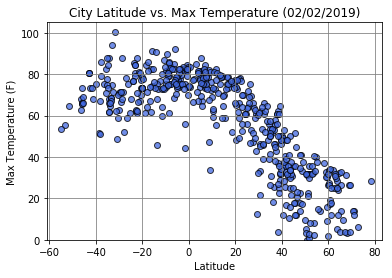

In [32]:
# Build Scatter Plot
plt.scatter(data_df['Lat'],data_df['Max_temp'], facecolor='royalblue', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(0, 105)
plt.xlim(-61, 83)
# Set titles
plt.title("City Latitude vs. Max Temperature (02/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

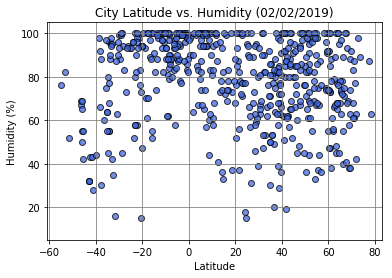

In [33]:
# Build Scatter Plot
plt.scatter(data_df['Lat'],data_df['Humidity'], facecolor='royalblue', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(5, 105)
plt.xlim(-61, 83)
# Set titles
plt.title("City Latitude vs. Humidity (02/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

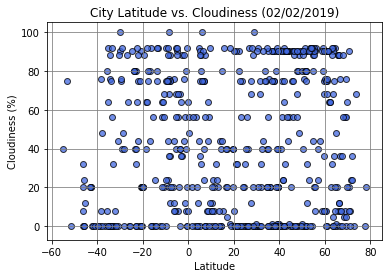

In [34]:
# Build Scatter Plot
plt.scatter(data_df['Lat'],data_df['Cloudiness'], facecolor='royalblue', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(-7, 105)
plt.xlim(-62, 85)
# Set titles
plt.title("City Latitude vs. Cloudiness (02/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

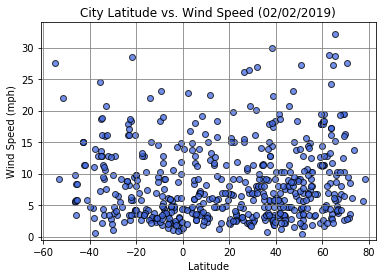

In [35]:
# Build Scatter Plot
plt.scatter(data_df['Lat'],data_df['Wind_speed'], facecolor='royalblue', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(-.5, 34)
plt.xlim(-61, 83)
# Set titles
plt.title("City Latitude vs. Wind Speed (02/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")
# Show plot
plt.show()